<a href="https://colab.research.google.com/github/Adityasri00/Horse_or_Human_Classification_of_Image_using_CNN/blob/main/Horse_or_Human_classification_of_Image_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import os

In [2]:
dataset,info = tfds.load('horses_or_humans',with_info=True,as_supervised=True)
class_names= info.features['label'].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.3D0497_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.3D0497_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [3]:
for i, example in enumerate(dataset['train']):
    image,label=example[0],example[1]
    save_dir = './horse-or-human/train/{}'.format(class_names[label])
    os.makedirs(save_dir,exist_ok=True)
    filename = '{}_{}.jpg'.format(class_names[label],i)
    filepath = save_dir+'/'+filename
    tf.keras.preprocessing.image.save_img(filepath,image)
    #break
for i, example in enumerate(dataset['test']):
    image,label=example[0],example[1]
    save_dir = './horse-or-human/test/{}'.format(class_names[label])
    os.makedirs(save_dir,exist_ok=True)
    filename = '{}_{}.jpg'.format(class_names[label],i)
    filepath = save_dir+'/'+filename
    tf.keras.preprocessing.image.save_img(filepath,image)
    #break

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir='/content/horse-or-human/train'
image_size=(300,300)
batch_size=25

train_datagen = ImageDataGenerator(rescale = 1/255)
train_genarator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_dir='/content/horse-or-human/test'
image_size=(300,300)
batch_size=25
test_datagen = ImageDataGenerator(rescale = 1/255)
test_genarator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [6]:
train_genarator.class_indices

{'horses': 0, 'humans': 1}

In [7]:
#data visuvalisation
import matplotlib.pyplot as plt
import matplotlib.image as mping

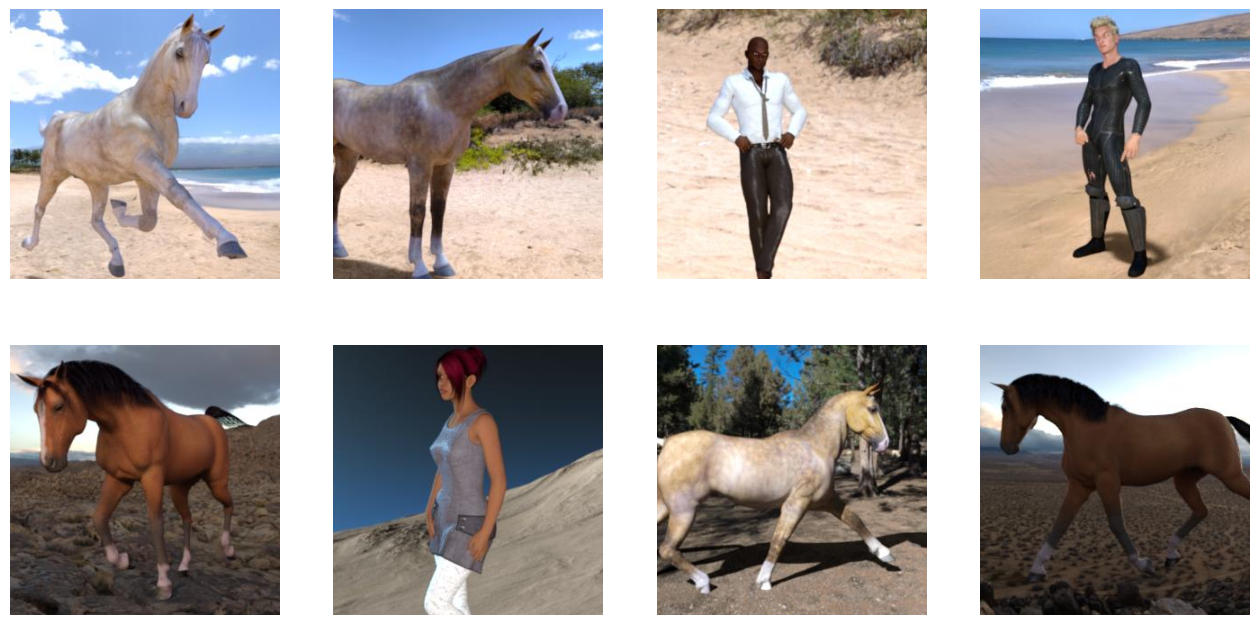

In [10]:
nrow =2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrow*4)
next_batch = next(train_genarator)
for i in range(0,ncols*nrow):
  ax = plt.subplot(nrow,ncols,i+1)
  ax.axis('off')
  plt.imshow(next_batch[0][i])
plt.show()

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam

In [12]:
def get_model():
  model = Sequential()
  #1st layer
  model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu', input_shape=(300,300,3)))
  model.add(MaxPool2D(pool_size=2))
  #2nd layer
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=2))
  #3rd layer
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=2))
  #Flatten layer and  FCN
  model.add(Flatten())
  model.add(Dense(512,activation = 'relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model



In [13]:
model= get_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    89,719,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,813,057 (342.61 MB)

 Trainable params: 89,813,057 (342.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_genarator,epochs=5,validation_data=test_genarator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 289s 7s/step - accuracy: 0.6340 - loss: 2.8181 - val_accuracy: 0.6641 - val_loss: 2.2145
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 282s 7s/step - accuracy: 0.9738 - loss: 0.0584 - val_accuracy: 0.7617 - val_loss: 2.3819
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 279s 7s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8047 - val_loss: 2.2307
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 279s 7s/step - accuracy: 1.0000 - loss: 3.5560e-04 - val_accuracy: 0.7930 - val_loss: 2.7149
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 279s 7s/step - accuracy: 1.0000 - loss: 1.0890e-04 - val_accuracy: 0.7891 - val_loss: 2.9810


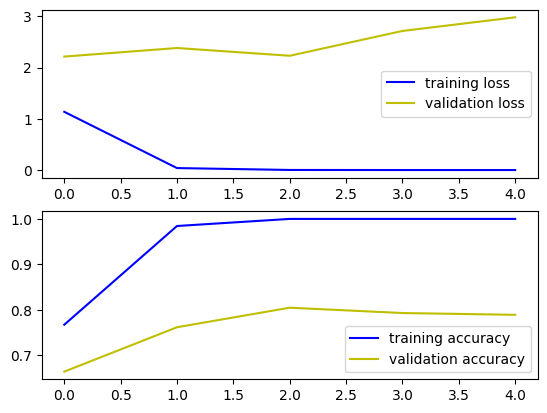

In [16]:
#plot loss and accuracy curve
fix,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b', label='training loss')
ax[0].plot(history.history['val_loss'],color ='y',label='validation loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'],color='b', label='training accuracy')
ax[1].plot(history.history['val_accuracy'],color ='y',label='validation accuracy')
ax[1].legend(loc='best')


In [17]:
model.save('horse-or-human.h5')

In [18]:
#load model
from tensorflow.keras.models import load_model
model_load = load_model('horse-or-human.h5')

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/horse-or-human/test/horses/horses_112.jpg',target_size = image_size)
img = image.img_to_array(img)
img = np.expand_dims(img,axis =0)
img = img/255

#prediction
predict= model_load.predict(img)
print(predict)
TH =0.5
predictied_class = int(predict[0][0]>TH)
class_indices = train_genarator.class_indices
labels = {v:k for k,v in class_indices.items()}
labels[predictied_class]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[[0.00044588]]


'horses'